In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, OneHotEncoder, OrdinalEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
# Se carga el dataset de trabajo y se comprueba la información general
path = ("../data/weather_classification_data.csv")
df = pd.read_csv(path, delimiter = ",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [3]:
# Se eliminan los espacios en los nombres de las columnas
df.rename(columns = {"Wind Speed": "Wind_Speed", "Precipitation (%)": "Precipitation", "Cloud Cover": "Cloud_Cover", "Atmospheric Pressure":"Atm_Press", "Visibility (km)":"Visibility", "UV Index":"UV_I", "Weather Type":"Weather_Type"}, inplace = True)
df.columns

Index(['Temperature', 'Humidity', 'Wind_Speed', 'Precipitation', 'Cloud_Cover',
       'Atm_Press', 'UV_I', 'Season', 'Visibility', 'Location',
       'Weather_Type'],
      dtype='object')

In [4]:
# Se identifica la variable objetivo y se separan los subconjuntos train/test
target = "Weather_Type"
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

In [5]:
train_set.Weather_Type.value_counts()

Weather_Type
Sunny     2659
Rainy     2653
Cloudy    2649
Snowy     2599
Name: count, dtype: int64

In [6]:
# Se codifican los valores del target
categories = [["Sunny","Cloudy","Rainy","Snowy"]]
encoder = OrdinalEncoder(categories = categories)
train_set[target] = encoder.fit_transform(train_set[[target]])
test_set[target] = encoder.fit_transform(test_set[[target]])

In [7]:
train_set.Weather_Type.value_counts()

Weather_Type
0.0    2659
2.0    2653
1.0    2649
3.0    2599
Name: count, dtype: int64

In [8]:
# Se separan los subconjuntos X,y
X_train = train_set.copy()
X_train.drop(columns = target, inplace = True)
y_train = train_set[target]

X_test = test_set.copy()
X_test.drop(columns = target, inplace = True)
y_test = test_set[target]

### Mini EDA

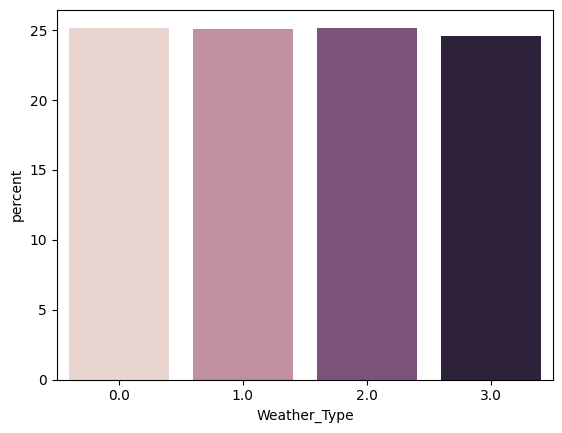

In [9]:
# Se comprueba la distribución del target
sns.countplot(x = y_train, stat = "percent", hue = y_train, legend = False);

In [10]:
# Se comprueban los valores de las variables no numéricas
print(X_train.Cloud_Cover.value_counts(), "\n")
print(X_train.Season.value_counts(), "\n")
print(X_train.Location.value_counts())

Cloud_Cover
overcast         4841
partly cloudy    3667
clear            1728
cloudy            324
Name: count, dtype: int64 

Season
Winter    4473
Spring    2077
Autumn    2025
Summer    1985
Name: count, dtype: int64 

Location
inland      3831
mountain    3829
coastal     2900
Name: count, dtype: int64


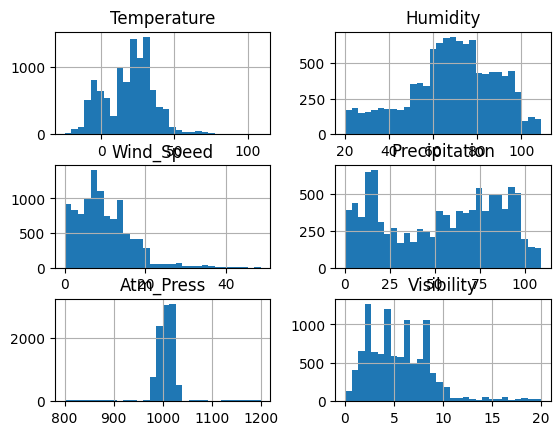

In [11]:
# Se comprueba gráficamente la distribución de las variables numéricas
lista_num = ["Temperature","Humidity","Wind_Speed","Precipitation","Atm_Press","Visibility"]
X_train[lista_num].hist(bins = 30);

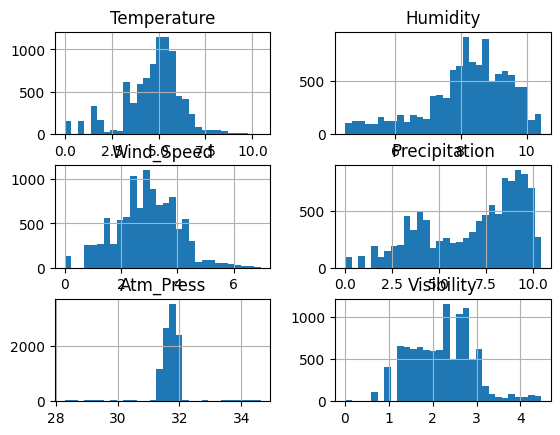

In [12]:
# Se comprueban diferentes modificaciones
X_train[lista_num].apply(np.sqrt).hist(bins = 30);

Temperature      -25.00
Humidity          20.00
Wind_Speed         0.00
Precipitation      0.00
Atm_Press        800.12
Visibility         0.00
dtype: float64


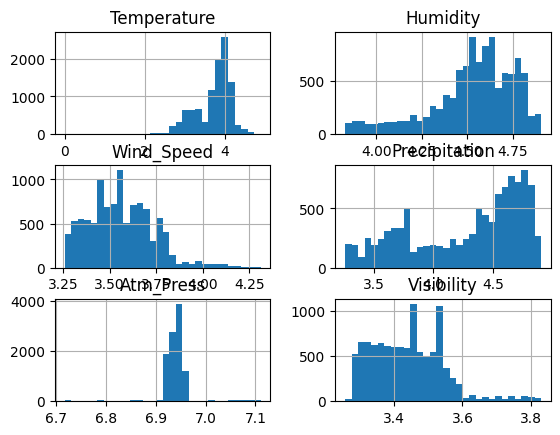

In [13]:
print(X_train[lista_num].min())
X_train[lista_num] = X_train[lista_num] + 25
X_train[lista_num].apply(np.log1p).hist(bins = 30);

In [14]:
#lista_num.remove("UV_I")
lista_cat = ["Cloud_Cover","Season","Location","UV_I"]
print(lista_num)
print(lista_cat)

['Temperature', 'Humidity', 'Wind_Speed', 'Precipitation', 'Atm_Press', 'Visibility']
['Cloud_Cover', 'Season', 'Location', 'UV_I']


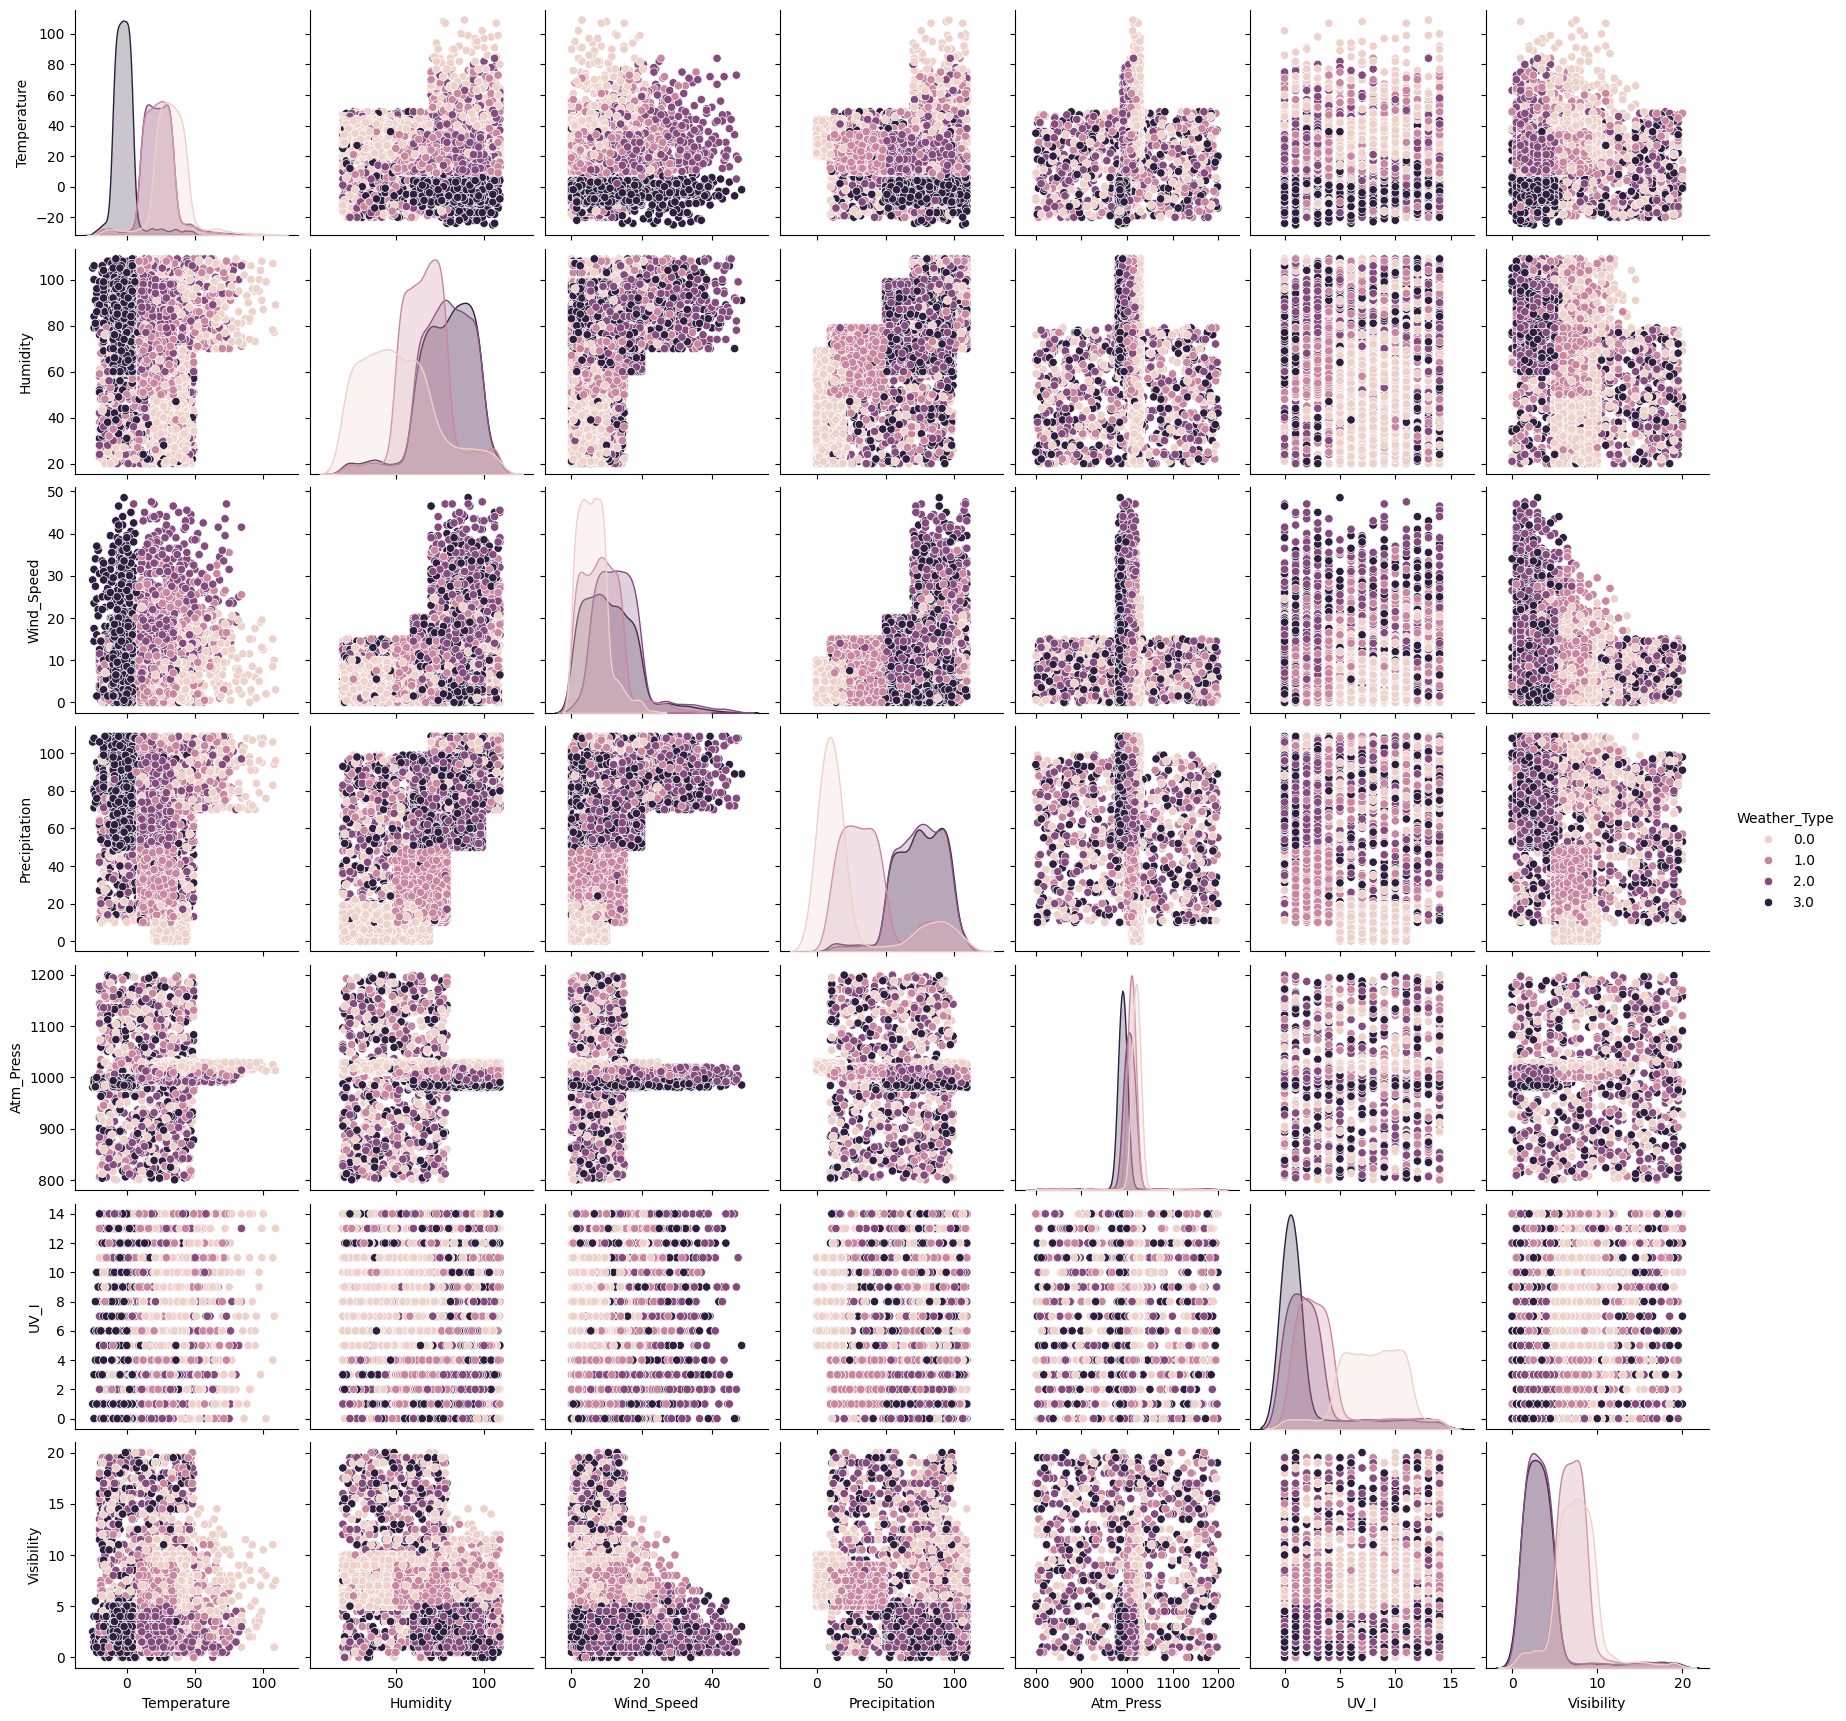

In [15]:
# Se comprueba gráficamente la relación entre todas las variables
sns.pairplot(train_set, hue = target);